## 影像顯示方式  
### RGB vs. BGR      
https://blueskyson.github.io/2021/12/24/opencv-basic-code-example/
https://learnopencv.com/why-does-opencv-use-bgr-color-format/


### img = imgBGR[:,:,::-1] 程式碼參考：   
https://blog.csdn.net/HARDBIRD123/article/details/82261651
https://www.runoob.com/note/51257

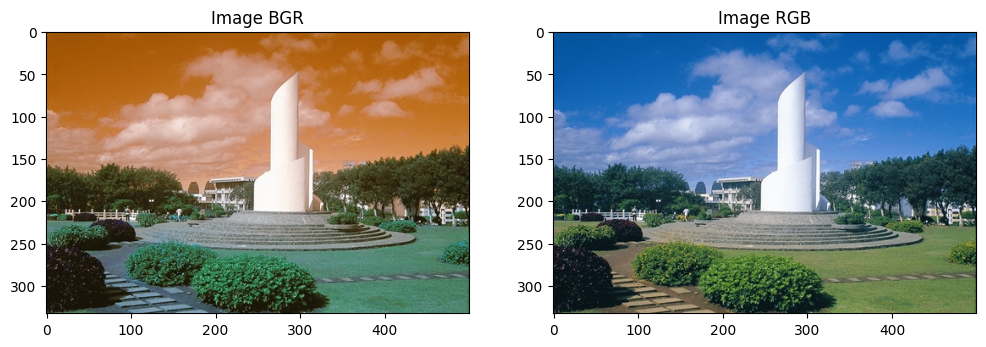

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

imgBGR = cv2.imread("Commons.jpeg", cv2.IMREAD_COLOR)

#------------------- Code Here -------------------#
imgRGB = imgBGR[:,:,::-1]
#------------------- Stop Here -------------------#

plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)   
plt.title('Image BGR') 
plt.imshow(imgBGR)
plt.subplot(2,2,2)     
plt.title('Image RGB') 
plt.imshow(imgRGB)


## 獲得影像資訊

## <font color="Red"> 1.1 Please find the defect region of these two images: texture01.jpg, texture02.jpg</font><p>
<table><tr>    
    <td><img src="texture01.jpg" width="300px"></td>
    <td><img src="texture02.jpg" width="300px"></td>
</tr></table>    
and show as follows. <p>'
<img src="ROI_results.png" width="600px"> 

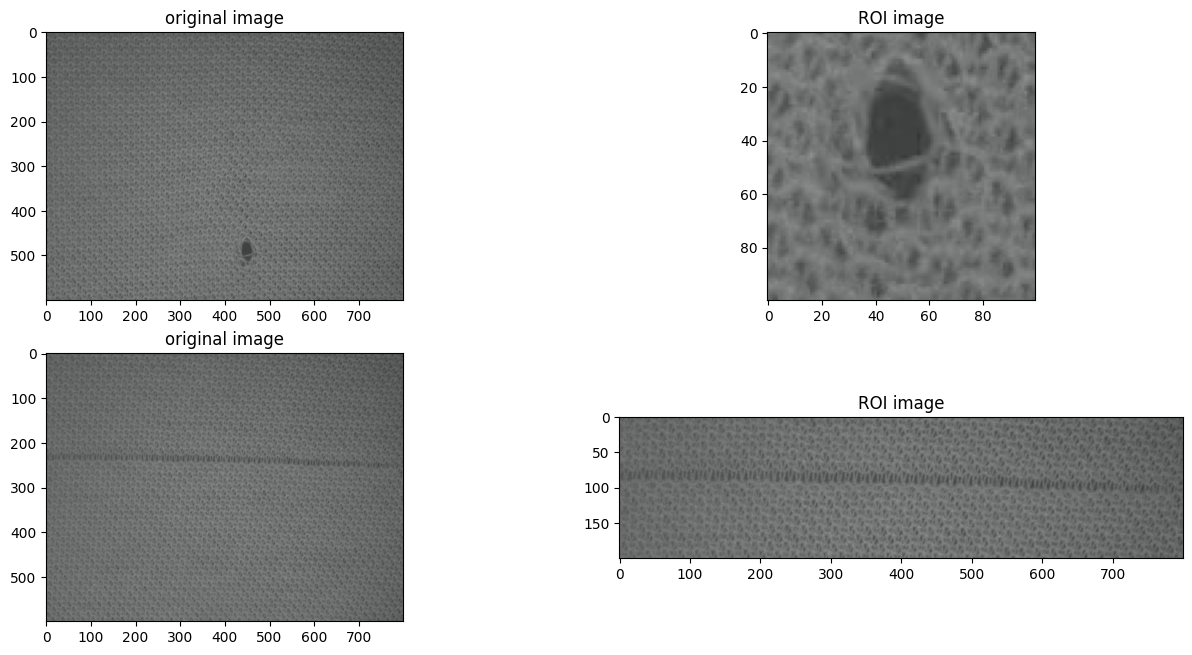

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread( "texture01.jpg", cv2.IMREAD_COLOR)
img2 = cv2.imread( "texture02.jpg", cv2.IMREAD_COLOR)

#------------------- Code Here -------------------#
ROI_r1 = 450
ROI_c1 = 400
ROI_nr1= 100
ROI_nc1 = 100
ROI_r2 = 150
ROI_c2 = 0
ROI_nr2= 200
ROI_nc2 = 800
newImg1 = img1[ ROI_r1 : ROI_r1 + ROI_nr1, ROI_c1 : ROI_c1 + ROI_nc1 ]
newImg2 = img2[ ROI_r2 : ROI_r2 + ROI_nr2, ROI_c2 : ROI_c2 + ROI_nc2 ]
#------------------- Stop Here -------------------#

plt.figure(figsize=(16, 16))
plt.subplot(4,2,1)   
plt.title('original image') 
plt.imshow(img1,cmap=plt.cm.gray)
plt.subplot(4,2,2)   
plt.title('ROI image') 
plt.imshow(newImg1,cmap=plt.cm.gray)
plt.subplot(4,2,3)   
plt.title('original image') 
plt.imshow(img2,cmap=plt.cm.gray)
plt.subplot(4,2,4)   
plt.title('ROI image') 
plt.imshow(newImg2,cmap=plt.cm.gray)

## 使用 opencv: puttext 來繪製文字至影像中 

參考資料：     

https://shengyu7697.github.io/python-opencv-puttext/    

https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html#cv2.putText

## <font color="Red"> 1.2 練習：嵌入一段文字到影像中  
<font color="Red"> 分別使用 FONT_HERSHEY_SIMPLEX 與 FONT_HERSHEY_TRIPLEX 字型</font>
<img src="text_image.png" width="800px">

True

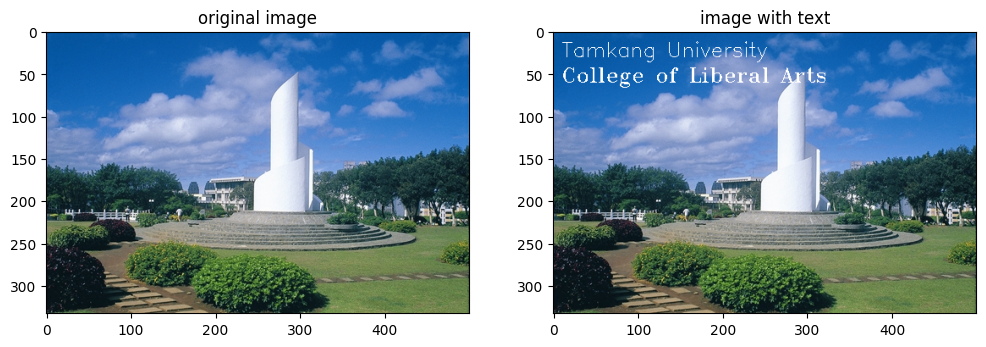

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
img_ori = imgBGR[:,:,::-1]
#------------------- Code Here -------------------#
img_new=img_ori.copy()
fontFace = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img_new, "Tamkang University", ( 10, 30 ), fontFace, 0.8, ( 255, 255, 255 ) )
fontFace = cv2.FONT_HERSHEY_TRIPLEX
cv2.putText(img_new, "College of Liberal Arts", ( 10, 60 ), fontFace, 0.8, ( 255, 255, 255 ) )
#------------------- Stop Here -------------------#

plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)   
plt.title('original image') 
plt.imshow(img_ori)
plt.subplot(2,2,2)   
plt.title('image with text') 
plt.imshow(img_new)
cv2.imwrite("TKU.jpg",cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

## 使用中文字畫圖   

https://steam.oxxostudio.tw/category/python/ai/opencv-text.html

## <font color="Red"> 1.3 練習：嵌入一段中文字到影像中  
<img src="text_image2.png" width="800px">

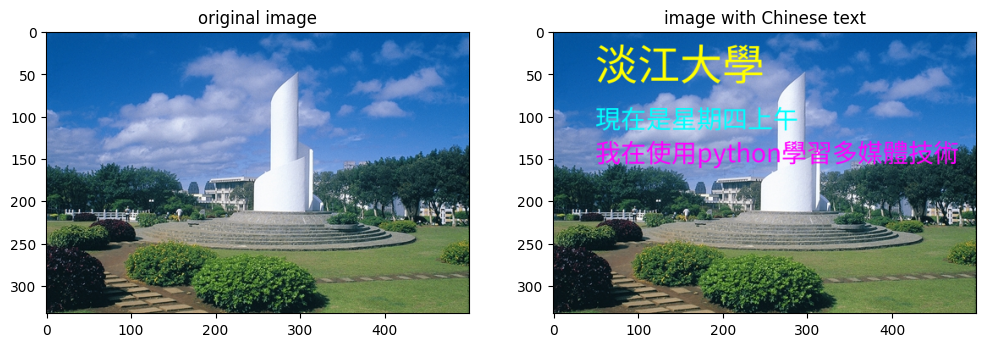

In [45]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont  # 載入 PIL 相關函式庫

#------------------- Code Here -------------------#
imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR)
img_ori = imgBGR[:,:,::-1]
fontpath = 'NotoSansTC-Regular.ttf' 
imgPil = Image.fromarray(img_ori)   
draw = ImageDraw.Draw(imgPil)                # 準備開始畫畫
draw.text((50, 0), '淡江大學', fill=(255, 255, 0), font=ImageFont.truetype(fontpath, 50) ) 
draw.text((50,80),  '現在是星期四上午', fill=(0, 255, 255), font=ImageFont.truetype(fontpath, 30) )
draw.text((50,120), '我在使用python學習多媒體技術', fill=(255, 0, 255), font=ImageFont.truetype(fontpath, 30) )# 畫入文字
img = np.array(imgPil)    
#------------------- Stop Here -------------------#

plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)   
plt.title('original image') 
plt.imshow(img_ori)
plt.subplot(2,2,2)   
plt.title('image with Chinese text') 
plt.imshow(img)


## 影像成像模型Image Formation Model
<img src="Image_Formation_Theory.png" width="800px">

<br><br>
### 產生 reflectance image後    
### 調整影像成像模型的結果

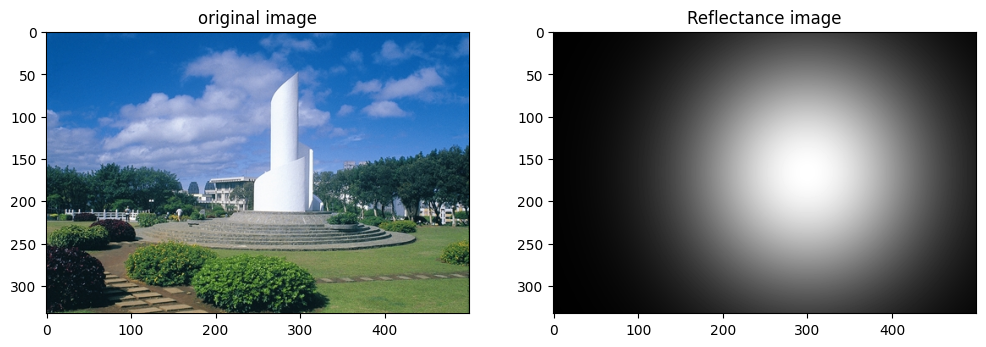

In [86]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def image_formation_model( f, x0, y0, sigma ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    reflectance = np.zeros( [ nr, nc ], dtype = 'float32' )
    for x in range( nr ):
        for y in range( nc ):
            reflectance[x,y] = np.floor(255*np.exp( -( (x-x0)**2 + (y-y0)**2 ) / (2*sigma*sigma) ))
    for x in range( nr ):
        for y in range( nc ):
            for k in range( 3 ):
                val = round( reflectance[x,y] * f[x,y,k])
                g[x,y,k] = np.uint8( val )
    return reflectance


imgBGR = cv2.imread("Commons.jpeg", cv2.IMREAD_COLOR)
img = imgBGR[:,:,::-1]
nr, nc = img.shape[:2]
x0 = nr/2
y0 = nc/2+50
sigma = 100
img2 = image_formation_model( img, x0, y0, sigma )
plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(img)
plt.subplot(1,2,2)   
plt.title('Reflectance image') 
plt.imshow(img2,cmap=plt.cm.gray)

## <font color="Red"> 1.4 檢視並完成上述影像的 Formation 結果
<img src="1_4_image_formation.png" width="800px">

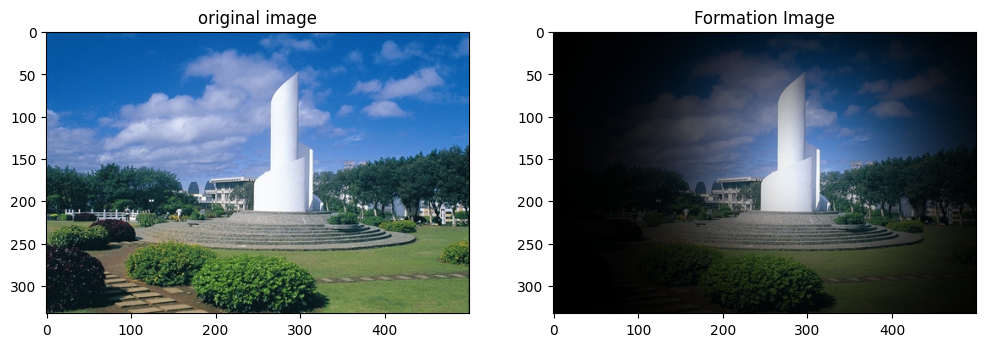

In [90]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#------------------- Code Here -------------------#
def image_formation_model( f, x0, y0, sigma ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    reflectance = np.zeros( [ nr, nc ], dtype = 'float32' )
    for x in range( nr ):
        for y in range( nc ):
            reflectance[x,y] = np.floor(255*np.exp( -( (x-x0)**2 + (y-y0)**2 ) / (2*sigma*sigma) ))
    for x in range( nr ):
        for y in range( nc ):
            for k in range( 3 ):
                val = round( reflectance[x,y] * f[x,y,k]/255)
                g[x,y,k] = np.uint8( val )
    return g
#------------------- Stop Here -------------------#

imgBGR = cv2.imread("Commons.jpeg", cv2.IMREAD_COLOR)
img = imgBGR[:,:,::-1]
nr, nc = img.shape[:2]
x0 = nr/2
y0 = nc/2+50
sigma = 100
img2 = image_formation_model( img, x0, y0, sigma )
    
plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(img)
plt.subplot(1,2,2)   
plt.title('Formation Image') 
plt.imshow(img2)

## 影像縮小、放大
使用 opencv 的 cv2.INTER_NEAREST 內插法，還原縮小影像至原大小    
https://shengyu7697.github.io/python-opencv-resize/

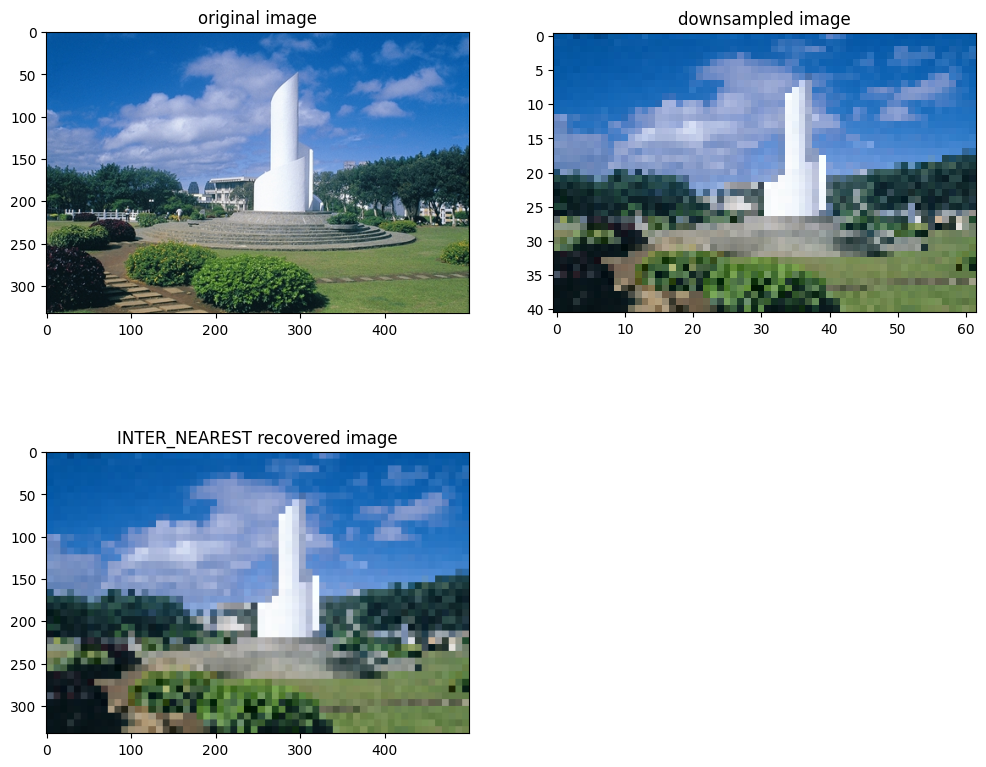

In [91]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def image_downsampling( f, sampling_rate ):
    nr, nc = f.shape[:2]
    nr_s, nc_s = nr // sampling_rate, nc // sampling_rate
    g = np.zeros( [ nr_s, nc_s, 3 ], dtype = 'uint8' )
    for x in range( nr_s ):
        for y in range( nc_s ):
            for z in range( 3 ):
                g[x,y,z] = f[x * sampling_rate, y * sampling_rate,z]
    return g


imgBGR = cv2.imread("Commons.jpeg", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
img2 = image_downsampling( img1, 8 )
nr, nc = img1.shape[:2]
img3 = cv2.resize( img2, ( nc, nr ), interpolation = cv2.INTER_NEAREST )
plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)   
plt.title('original image') 
plt.imshow(img1)
plt.subplot(2,2,2)   
plt.title('downsampled image') 
plt.imshow(img2)
plt.subplot(2,2,3)   
plt.title('INTER_NEAREST recovered image') 
plt.imshow(img3)


## <font color="Red"> 1.5 產生兩種內插法調整結果   
<font color="Red">請以上述程式碼為基礎，增加兩種內插法(INTER_LINEAR, INTER_CUBIC)調整結果，    
再顯示結果並檢視還原成果  
https://shengyu7697.github.io/python-opencv-resize/      

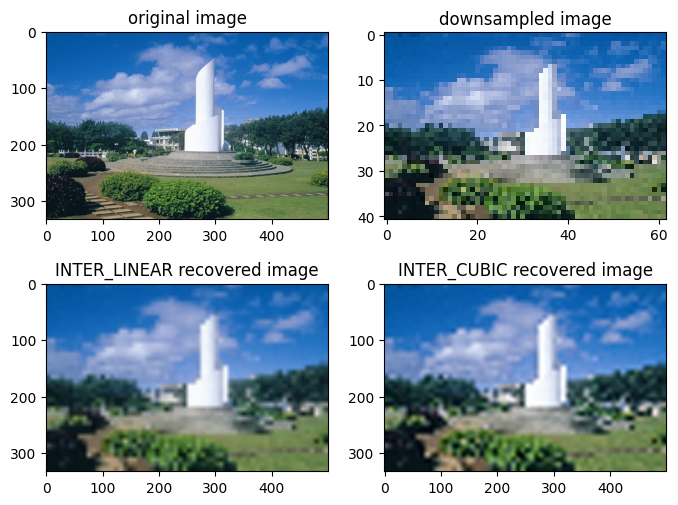

In [94]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def image_downsampling( f, sampling_rate ):
    nr, nc = f.shape[:2]
    nr_s, nc_s = nr // sampling_rate, nc // sampling_rate
    g = np.zeros( [ nr_s, nc_s, 3 ], dtype = 'uint8' )
    for x in range( nr_s ):
        for y in range( nc_s ):
            for z in range( 3 ):
                g[x,y,z] = f[x * sampling_rate, y * sampling_rate,z]
    return g

imgBGR = cv2.imread("Commons.jpeg", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
img2 = image_downsampling( img1, 8 )
nr, nc = img1.shape[:2]
#------------------- Code Here -------------------#    
img3 = cv2.resize( img2, ( nc, nr ), interpolation = cv2.INTER_LINEAR )
img4 = cv2.resize( img2, ( nc, nr ), interpolation = cv2.INTER_CUBIC )

#------------------- Stop Here -------------------#
plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)   
plt.title('original image') 
plt.imshow(img1)
plt.subplot(2,2,2)   
plt.title('downsampled image') 
plt.imshow(img2)
plt.subplot(2,2,3)   
plt.title('INTER_LINEAR recovered image') 
plt.imshow(img3)
plt.subplot(2,2,4)   
plt.title('INTER_CUBIC recovered image') 
plt.imshow(img4)    

## 影像旋轉與翻轉   

### 旋轉(cv2.rotate的三種參數)   

<table>
  <tbody>
    <tr>
      <td>ROTATE_90_CLOCKWISE</td>
      <td>順時針旋轉90度</td>
    </tr>
    <tr>
      <td>ROTATE_180</td>
      <td>順時針旋轉180度</td>
    </tr>
    <tr>
      <td>ROTATE_90_COUNTERCLOCKWISE</td>
      <td>逆時針旋轉90度</td>
    </tr>  
  </tbody>
</table>

### 翻轉(cv2.flip)      

<table>
  <tbody>
    <tr>
      <td>cv2.flip(image,1)</td>
      <td>水平翻轉</td>
    </tr>
    <tr>
      <td>cv2.flip(image,0)</td>
      <td>垂直翻轉</td>
    </tr>
    <tr>
      <td>cv2.flip(image,-1)</td>
      <td>水平垂直翻轉</td>
    </tr>  
  </tbody>
</table>

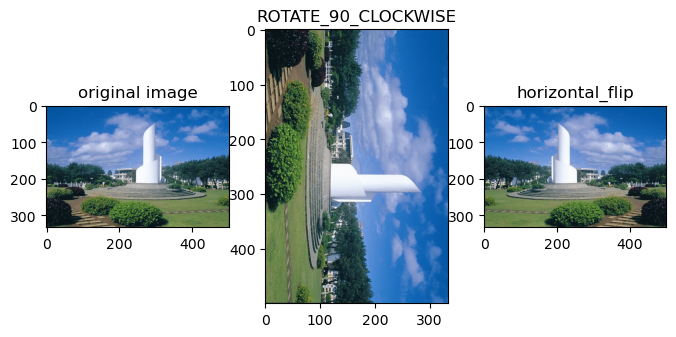

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

imgBGR = cv2.imread("Commons.jpeg", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
img2 = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE)
img3 = cv2.flip(img1,1)

plt.figure(figsize=(8, 6))
plt.subplot(1,3,1)   
plt.title('original image') 
plt.imshow(img1)
plt.subplot(1,3,2)   
plt.title('ROTATE_90_CLOCKWISE') 
plt.imshow(img2)
plt.subplot(1,3,3)   
plt.title('horizontal_flip') 
plt.imshow(img3)


## <font color="Red"> 1.6 影像旋轉與翻轉練習   
<font color="Red">請以上述程式碼為基礎，產生下列的影像     
<img src="1_6_images.png" width="800px">

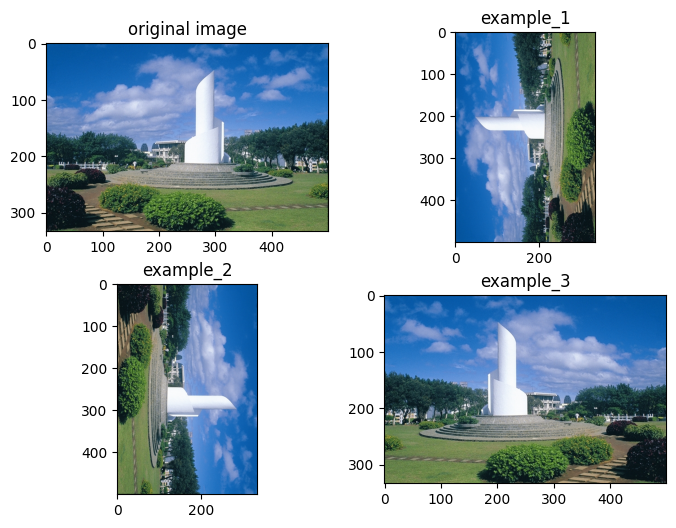

In [98]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#------------------- Code Here -------------------#  
imgBGR = cv2.imread("Commons.jpeg", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
img2 = cv2.rotate(img1, cv2.ROTATE_90_COUNTERCLOCKWISE)
img3 = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE)
img4 = cv2.flip(img1,1)

#------------------- Stop Here -------------------#  
plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)   
plt.title('original image') 
plt.imshow(img1)
plt.subplot(2,2,2)   
plt.title('example_1') 
plt.imshow(img2)
plt.subplot(2,2,3)   
plt.title('example_2') 
plt.imshow(img3)
plt.subplot(2,2,4)   
plt.title('example_3') 
plt.imshow(img4)